[![logo](https://climate.copernicus.eu/sites/default/files/custom-uploads/branding/LogoLine_horizon_CAMS.png)](https://atmosphere.copernicus.eu)

<hr>

# Pandonia Global Network - Ozone

### About
The Pandonia Global Network (PGN) enables the systematic processing and dissemination of the data in support of air quality monitoring and satellite validation. It provides real-time, standardized, calibrated and verified air quality data and associated uncertainty values. The PGN is carried out jointly by NASA and ESA as part of their “Joint Program Planning Group Subgroup” on calibration and validation and field activities, with additional collaboration such as the US Environmental Protection Agency (EPA). ([Source](https://www.pandonia-global-network.org/home/about/about-pgn/))



### Basic Facts

> **Spatial coverage**: `Observation stations worldwide` <br>
> **Temporal resolution**:  `sub-daily` <br>
> **Temporal coverage**: `Depends on station` <br>
> **Data format**: `TXT` or `GEOMS / HDF`  <br>
> **Versions**: `Level 0 (low quality)`, `Level 1 (medium quality)`, `Level 2.0 (high quality)`


### How to access the data

PGN data are available for download via the [PDN web interface](https://data.pandonia-global-network.org/).

The data product (e.g. gas, observation geometry, processor level) is "encrypted" in the filename. The corresponding "cheat-sheet" can be found [here](https://www.pandonia-global-network.org/wp-content/uploads/2022/12/PGN_DataProducts_Readme_v1-8-6.pdf).

### Module outline
* [1 - Download PGN data for a specific station and time period](#pgn_download)
* [2 - Read the observation data with pandas](#pgn_read)
* [3 - Visualize the PGN data for  Ozone](#pgn_visualize)

<hr>

#### Load required libraries

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import requests

<hr>

### <a id='pgn_download'></a>1. Browse metadata for a specific station and time period

The station that is featured in this notebook is the Ny Alesund station in Ny-Ålesund, Svalbard, Norway. The instrument number is 152.

After downloading the file from the web interface, we can define a file path where the `txt` file is stored.

In [25]:
data_url = 'https://data.pandonia-global-network.org/NyAlesund/Pandora152s1/L2/Pandora152s1_NyAlesund_L2_rout2p1-8.txt'

In [26]:
r = requests.get(data_url)

In [27]:
file_path = f'data/Pandora152s1_NyAlesund_L2_rout2p1-8.txt'
with open(file_path, 'wb') as f:
        f.write(r.content)

In [38]:
f.close()

The following code block prints the metadata of the file as well as the column descriptions.

In [28]:
# Print header
with open(file_path, 'rb') as f:
    flag = 0
    columns = []
    while flag < 2:
        line = f.readline().decode('utf8', 'ignore').strip()
        print(line)
        if "----------" in line:
            flag += 1
        if flag == 1:
            ss = line.split(':')
            try:
                columns.append(ss[1].strip())
            except Exception:
                pass

# now in columns there is columns description

File name: Pandora152s1_NyAlesund_L2_rout2p1-8.txt
File generation date: 20240821T232624.1Z
Data description: Level 2 file (columns and more)
Data file version: rout2p1-8
Data product status: Ozone data are official
Local principal investigator: Fjaeraa;Ann Mari
Network principal investigator: Alexander Cede
DOI: 10.48596/pgn.rout2p1-8.NyAlesund.P152s1
Instrument type: Pandora
Instrument number: 152
Spectrometer number: 1
Processing software version used: BlickP v1.8.24
Full location name: Norwegian Polar Institute Sverdrup
Short location name: NyAlesund
Country of location: Norway
Location latitude [deg]: 78.9233
Location longitude [deg]: 11.9299
Location altitude [m]: 18
Data start time: 20200327T092339.
Data end time: NONE
Data caveats: None
---------------------------------------------------------------------------------------
Column 1: UT date and time for measurement center, yyyymmddThhmmssZ (ISO 8601)
Column 2: Fractional days since 1-Jan-2000 UT midnight for measurement center


### <a id='pgn_read'></a>2. Read the observation data with pandas

The next step is now to read the downloaded `txt`. Let us start with the file of all station measurements for the station Innsbruck. You can read the file with the function `read_csv` from the Python library [Pandas](https://pandas.pydata.org/). If you inspect the txt file before (you can simply open it), you see that the first few lines contain information we do not need in the pandas dataframe. For this reason, we can set additonal keyword arguments that allow us to specify the columns and rows of interest:
* `sep`: specify the separator in the text file, e.g. a space
* `encoding`: specify the encoding of the file
* `skiprows`: specify how many rows to skip
* `header`: specify the index of the row that shall be set as header, e.g. `None` as this file has no header row

You see below that the resulting dataframe has 54192 rows and 52 columns.

In [29]:
df = pd.read_csv(file_path, encoding= 'unicode_escape', skiprows=77, sep=' ', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,20200327T093805.1Z,7391.401448,30.18,77.12,154.48,74.04,120.54,0.2644,0.008017,0.24850,...,-9.0,0.035151,224.37,-2.0,5.51,-2.0,5.51,4.203,0.003,0.0
1,20200327T094356.4Z,7391.405514,30.89,77.00,155.97,73.79,121.97,0.2371,0.007702,0.22920,...,-9.0,0.031763,224.37,-2.0,5.51,-2.0,5.51,4.169,0.003,0.0
2,20200327T095020.6Z,7391.409960,29.14,76.88,157.61,73.52,123.55,0.1548,0.006631,0.22630,...,-9.0,0.020903,224.37,-2.0,5.51,-2.0,5.51,4.137,0.003,0.0
3,20200327T095720.6Z,7391.414822,31.16,76.75,159.40,73.23,125.27,0.3163,0.009513,0.22610,...,-9.0,0.043133,224.37,-2.0,5.51,-2.0,5.51,4.102,0.003,0.0
4,20200327T102837.9Z,7391.436550,29.86,76.32,167.42,72.00,133.01,0.1371,0.006667,0.24270,...,-9.0,0.019201,224.38,-2.0,5.51,-2.0,5.51,3.990,0.003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64890,20240821T060922.9Z,8999.256515,48.80,75.72,100.97,95.29,262.47,0.4362,0.008863,0.15730,...,-9.0,0.065319,232.31,-2.0,5.51,-2.0,5.51,3.850,0.002,0.0
64891,20240821T062747.4Z,8999.269299,45.62,74.86,105.54,96.05,266.85,0.2272,0.005512,0.16370,...,-9.0,0.035519,232.31,-2.0,5.51,-2.0,5.51,3.656,0.002,0.0
64892,20240821T064123.6Z,8999.278746,50.23,74.24,108.93,96.61,270.08,0.2260,0.009198,0.25650,...,-9.0,0.036666,232.31,-2.0,5.51,-2.0,5.51,3.528,0.002,0.0
64893,20240821T070341.5Z,8999.294230,48.37,73.25,114.52,97.54,275.39,0.0610,0.005284,0.06325,...,-9.0,0.010431,232.30,-2.0,5.51,-2.0,5.51,3.342,0.002,0.0


Next, you can set the date time column `0` as the index for the dataframe.

In [30]:
df = df.set_index(0)

Let us print out the dataframe to check that it looks correct.

In [31]:
df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,,,,,,,,,,,,,,,,,,,,,
20200327T093805.1Z,7391.401448,30.18,77.12,154.48,74.04,120.54,0.2644,0.008017,0.24850,0.007802,...,-9.0,0.035151,224.37,-2.0,5.51,-2.0,5.51,4.203,0.003,0.0
20200327T094356.4Z,7391.405514,30.89,77.00,155.97,73.79,121.97,0.2371,0.007702,0.22920,0.007092,...,-9.0,0.031763,224.37,-2.0,5.51,-2.0,5.51,4.169,0.003,0.0
20200327T095020.6Z,7391.409960,29.14,76.88,157.61,73.52,123.55,0.1548,0.006631,0.22630,0.006936,...,-9.0,0.020903,224.37,-2.0,5.51,-2.0,5.51,4.137,0.003,0.0
20200327T095720.6Z,7391.414822,31.16,76.75,159.40,73.23,125.27,0.3163,0.009513,0.22610,0.007087,...,-9.0,0.043133,224.37,-2.0,5.51,-2.0,5.51,4.102,0.003,0.0
20200327T102837.9Z,7391.436550,29.86,76.32,167.42,72.00,133.01,0.1371,0.006667,0.24270,0.006450,...,-9.0,0.019201,224.38,-2.0,5.51,-2.0,5.51,3.990,0.003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240821T060922.9Z,8999.256515,48.80,75.72,100.97,95.29,262.47,0.4362,0.008863,0.15730,0.003537,...,-9.0,0.065319,232.31,-2.0,5.51,-2.0,5.51,3.850,0.002,0.0
20240821T062747.4Z,8999.269299,45.62,74.86,105.54,96.05,266.85,0.2272,0.005512,0.16370,0.004857,...,-9.0,0.035519,232.31,-2.0,5.51,-2.0,5.51,3.656,0.002,0.0
20240821T064123.6Z,8999.278746,50.23,74.24,108.93,96.61,270.08,0.2260,0.009198,0.25650,0.010230,...,-9.0,0.036666,232.31,-2.0,5.51,-2.0,5.51,3.528,0.002,0.0


Now that the index is set correctly, you can parse the date column for the dataframe. To do so, the next step is to create an index as `DateTimeIndex`. We convert the index entry to a `DateTimeIndex` format with the function `to_datetime()`. Important here, you have to specify the format of combined index string.

In [32]:
df.index = pd.to_datetime(df.index, format = '%Y%m%dT%H%M%S.%fZ')
df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,,,,,,,,,,,,,,,,,,,,,
2020-03-27 09:38:05.100,7391.401448,30.18,77.12,154.48,74.04,120.54,0.2644,0.008017,0.24850,0.007802,...,-9.0,0.035151,224.37,-2.0,5.51,-2.0,5.51,4.203,0.003,0.0
2020-03-27 09:43:56.400,7391.405514,30.89,77.00,155.97,73.79,121.97,0.2371,0.007702,0.22920,0.007092,...,-9.0,0.031763,224.37,-2.0,5.51,-2.0,5.51,4.169,0.003,0.0
2020-03-27 09:50:20.600,7391.409960,29.14,76.88,157.61,73.52,123.55,0.1548,0.006631,0.22630,0.006936,...,-9.0,0.020903,224.37,-2.0,5.51,-2.0,5.51,4.137,0.003,0.0
2020-03-27 09:57:20.600,7391.414822,31.16,76.75,159.40,73.23,125.27,0.3163,0.009513,0.22610,0.007087,...,-9.0,0.043133,224.37,-2.0,5.51,-2.0,5.51,4.102,0.003,0.0
2020-03-27 10:28:37.900,7391.436550,29.86,76.32,167.42,72.00,133.01,0.1371,0.006667,0.24270,0.006450,...,-9.0,0.019201,224.38,-2.0,5.51,-2.0,5.51,3.990,0.003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21 06:09:22.900,8999.256515,48.80,75.72,100.97,95.29,262.47,0.4362,0.008863,0.15730,0.003537,...,-9.0,0.065319,232.31,-2.0,5.51,-2.0,5.51,3.850,0.002,0.0
2024-08-21 06:27:47.400,8999.269299,45.62,74.86,105.54,96.05,266.85,0.2272,0.005512,0.16370,0.004857,...,-9.0,0.035519,232.31,-2.0,5.51,-2.0,5.51,3.656,0.002,0.0
2024-08-21 06:41:23.600,8999.278746,50.23,74.24,108.93,96.61,270.08,0.2260,0.009198,0.25650,0.010230,...,-9.0,0.036666,232.31,-2.0,5.51,-2.0,5.51,3.528,0.002,0.0


The ozone column is described as containing `Ozone total vertical column amount [moles per square meter]` in the metadata. This column is referred to as column `39` in the metadata, however it is now column `38` in the dataframe because we are starting the column count at `0`. 

Now let us drop the values of the ozone column where there were no successful retrievals. The value `-9e99` indicates `retrieval not successful`.

To drop rows of a dataframe based on a value in a specific column, you can use the `drop()` method. If you pass in a boolean mask, the `drop()` method will drop the rows where the mask is True. Note that the number of rows is now lower than the before we dropped the rows where there were no successful retrievals.

In [33]:
# Create a boolean mask to identify the rows to be dropped.
mask = df[38] == -9e99

# Drop the rows with the mask.
o3_df = df.drop(df[mask].index)
o3_df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,,,,,,,,,,,,,,,,,,,,,
2020-03-27 09:38:05.100,7391.401448,30.18,77.12,154.48,74.04,120.54,0.2644,0.008017,0.24850,0.007802,...,-9.0,0.035151,224.37,-2.0,5.51,-2.0,5.51,4.203,0.003,0.0
2020-03-27 09:43:56.400,7391.405514,30.89,77.00,155.97,73.79,121.97,0.2371,0.007702,0.22920,0.007092,...,-9.0,0.031763,224.37,-2.0,5.51,-2.0,5.51,4.169,0.003,0.0
2020-03-27 09:50:20.600,7391.409960,29.14,76.88,157.61,73.52,123.55,0.1548,0.006631,0.22630,0.006936,...,-9.0,0.020903,224.37,-2.0,5.51,-2.0,5.51,4.137,0.003,0.0
2020-03-27 09:57:20.600,7391.414822,31.16,76.75,159.40,73.23,125.27,0.3163,0.009513,0.22610,0.007087,...,-9.0,0.043133,224.37,-2.0,5.51,-2.0,5.51,4.102,0.003,0.0
2020-03-27 10:28:37.900,7391.436550,29.86,76.32,167.42,72.00,133.01,0.1371,0.006667,0.24270,0.006450,...,-9.0,0.019201,224.38,-2.0,5.51,-2.0,5.51,3.990,0.003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21 06:09:22.900,8999.256515,48.80,75.72,100.97,95.29,262.47,0.4362,0.008863,0.15730,0.003537,...,-9.0,0.065319,232.31,-2.0,5.51,-2.0,5.51,3.850,0.002,0.0
2024-08-21 06:27:47.400,8999.269299,45.62,74.86,105.54,96.05,266.85,0.2272,0.005512,0.16370,0.004857,...,-9.0,0.035519,232.31,-2.0,5.51,-2.0,5.51,3.656,0.002,0.0
2024-08-21 06:41:23.600,8999.278746,50.23,74.24,108.93,96.61,270.08,0.2260,0.009198,0.25650,0.010230,...,-9.0,0.036666,232.31,-2.0,5.51,-2.0,5.51,3.528,0.002,0.0


Now you can do some quality control for the nitrogen dioxide values by filtering for certain values in the quality control column `L2 data quality flag for ozone` which is column `36` in the metadata but is now column `35` in the dataframe, since we are starting the column count from `0` instead of `1`. The quality flags are as follows:

* 0 = assured high quality
* 1 = assured medium quality
* 2 = assured low quality
* 10 = not-assured high quality
* 11 = not-assured medium quality
* 12 = not-assured low quality
* 20 = unusable high quality
* 21 = unusable medium quality
* 22 = unusable low quality

We can use the `.isin` method from Pandas to filter the dataframe by providing the quality control column number `35` and a list of the values that we want to include or keep in the filter.

In [34]:
# Define the filter
#qc_filter =  o3_df[35].isin([0,1,2,10,11,12,20,21,22])
qc_filter =  o3_df[35].isin([0,1,10,11])

# Apply the filter
o3_df_qc =  o3_df[qc_filter]
o3_df_qc

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,,,,,,,,,,,,,,,,,,,,,
2020-04-10 05:11:23.100,7405.216239,30.15,82.14,87.90,99.88,237.65,0.36870,0.008638,0.396000,0.009027,...,-9.0,0.033494,227.18,-2.0,5.51,-2.0,5.51,6.224,0.012,0.0
2020-04-10 05:24:49.900,7405.225577,29.74,81.49,91.19,100.45,240.76,0.42010,0.008016,0.302100,0.005820,...,-9.0,0.040382,227.18,-2.0,5.51,-2.0,5.51,5.872,0.010,0.0
2020-04-10 05:28:40.200,7405.228242,30.30,81.30,92.14,100.62,241.65,0.45570,0.008311,0.281700,0.005260,...,-9.0,0.044550,227.18,-2.0,5.51,-2.0,5.51,5.776,0.010,0.0
2020-04-10 05:30:34.100,7405.229562,30.26,81.21,92.60,100.70,242.09,0.41190,0.008198,0.233400,0.004913,...,-9.0,0.040606,227.18,-2.0,5.51,-2.0,5.51,5.732,0.009,0.0
2020-04-10 05:32:29.000,7405.230891,29.90,81.12,93.07,100.79,242.54,0.40950,0.007107,0.223900,0.004704,...,-9.0,0.040796,227.18,-2.0,5.51,-2.0,5.51,5.687,0.009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 13:49:17.000,8997.575892,48.90,68.95,220.50,115.98,42.59,0.01429,0.004911,0.004571,0.000552,...,-9.0,0.003009,232.69,-2.0,5.51,-2.0,5.51,2.720,0.001,0.0
2024-08-19 15:13:57.000,8997.634688,48.66,72.13,242.17,112.54,63.56,0.02415,0.004721,0.019220,0.001382,...,-9.0,0.004386,232.68,-2.0,5.51,-2.0,5.51,3.153,0.001,0.0
2024-08-19 15:20:56.400,8997.639542,48.85,72.43,243.94,112.22,65.26,0.04318,0.005168,0.025960,0.001643,...,-9.0,0.007724,232.68,-2.0,5.51,-2.0,5.51,3.202,0.001,0.0


Next, let us filter the dataframe to our period of interest where some anomalous values occur. To do so, we can create a boolean mask to idenfity the rows to be filtered by date, passing in the start and end dates of our period of interest. Next, we can then filter the dataframe with the mask using the `loc` method.

In [35]:
# Create a boolean mask to identify the rows to be filtered by date
mask = (o3_df_qc.index >= datetime(2020, 3, 1)) & (o3_df_qc.index <= datetime(2023, 12, 31))

# Filter the dataframe with the mask.
o3_df_qc = o3_df_qc.loc[mask]
o3_df_qc

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,,,,,,,,,,,,,,,,,,,,,
2020-04-10 05:11:23.100,7405.216239,30.15,82.14,87.90,99.88,237.65,0.3687,0.008638,0.3960,0.009027,...,-9.0,0.033494,227.18,-2.0,5.51,-2.0,5.51,6.224,0.012,0.0
2020-04-10 05:24:49.900,7405.225577,29.74,81.49,91.19,100.45,240.76,0.4201,0.008016,0.3021,0.005820,...,-9.0,0.040382,227.18,-2.0,5.51,-2.0,5.51,5.872,0.010,0.0
2020-04-10 05:28:40.200,7405.228242,30.30,81.30,92.14,100.62,241.65,0.4557,0.008311,0.2817,0.005260,...,-9.0,0.044550,227.18,-2.0,5.51,-2.0,5.51,5.776,0.010,0.0
2020-04-10 05:30:34.100,7405.229562,30.26,81.21,92.60,100.70,242.09,0.4119,0.008198,0.2334,0.004913,...,-9.0,0.040606,227.18,-2.0,5.51,-2.0,5.51,5.732,0.009,0.0
2020-04-10 05:32:29.000,7405.230891,29.90,81.12,93.07,100.79,242.54,0.4095,0.007107,0.2239,0.004704,...,-9.0,0.040796,227.18,-2.0,5.51,-2.0,5.51,5.687,0.009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26 10:12:58.800,8669.425681,48.85,80.42,167.13,119.71,27.08,0.3963,0.007269,0.1810,0.003313,...,-9.0,0.040621,224.08,-2.0,5.51,-2.0,5.51,5.375,0.008,0.0
2023-09-26 10:24:01.800,8669.433355,48.70,80.32,169.93,119.43,29.93,0.3314,0.005770,0.2050,0.003178,...,-9.0,0.034428,224.08,-2.0,5.51,-2.0,5.51,5.331,0.008,0.0
2023-09-26 10:31:02.700,8669.438226,48.77,80.27,171.71,119.24,31.74,0.2519,0.005151,0.2266,0.003110,...,-9.0,0.026139,224.08,-2.0,5.51,-2.0,5.51,5.309,0.008,0.0


### <a id='pgn_visualize'></a>3. Visualize the PGN data for Ozone

As mentioned earlier, the ozone column is described in the metadata as column `39` and it contains `Ozone total vertical column amount [moles per square meter]`. The O3 column is now column `38` in the dataframe. The data file also contains uncertainty values in metadata column `40`, which is column `39` in the dataframe. This column is described as `Independent uncertainty of ozone total vertical column amount [moles per square meter]`. 

We can save both these columns in a variable for plotting later.

In [36]:
o3 = o3_df_qc.loc[:,38]
o3_err = o3_df_qc.loc[:,39]

Now, you can plot the data using the `matplotlib` library with the following steps:
1) Define a figure and axis
2) Define the axis error bar with the uncertainty values
3) Add labels for the X and Y-axes
4) Format the date
5) Show the plot

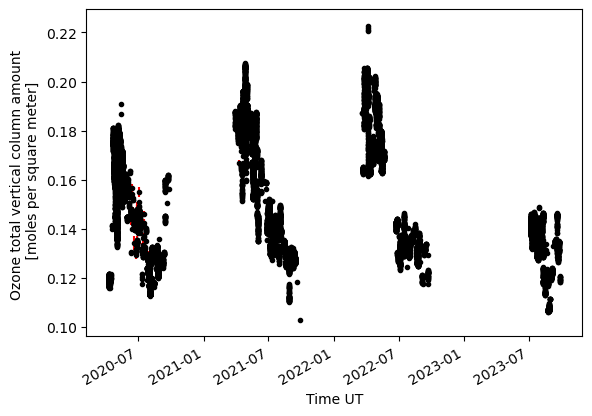

In [37]:
fig, ax = plt.subplots()
ax.errorbar(o3.index, o3, yerr=o3_err,ecolor='r', fmt='k.')
plt.xlabel('Time UT')
plt.ylabel('Ozone total vertical column amount \n [moles per square meter]')
fig.autofmt_xdate()
#plt.savefig('2020.png', dpi=300, bbox_inches='tight')
plt.show()

<hr>

<p><img src='../../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>